# Least square method

In [14]:
import time
import numpy as np
import scipy
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline


In [44]:
# Object function
def real_func(x):
    # return 2.6*x+0.8
    return np.sin(2*np.pi*x)

# Polynomial
def fit_func(p,x):
    f = np.poly1d(p)
    return f(x)

def residuals_func(p,x,y):
    ret = fit_func(p,x) - y
    return ret

In [45]:
x = np.linspace(0,1,10)
x_points = np.linspace(0,1,1000)
y_ = real_func(x)
y = [np.random.normal(0,0.1) + y1 for y1 in y_]

In [46]:
def fitting(M=0):
    """
    M is polynomial coefficient 
    """
    #随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # least square method
    p_lsq = leastsq(residuals_func,p_init,args=(x,y))
    print("Fitting Parameters: ", p_lsq[0])

    #Visualizing
    plt.plot(x_points,real_func(x_points),label='real')
    plt.plot(x_points,fit_func(p_lsq[0],x_points),label='fitted curve')
    plt.plot(x,y,'bo',label='noise')
    plt.legend()

    return p_lsq


Fitting Parameters:  [0.00918773]


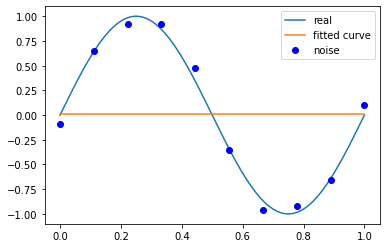

In [47]:
# M=0
p_lsq_0 = fitting(M=0)

Fitting Parameters:  [-1.25708678  0.63773112]


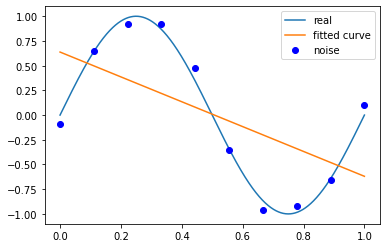

In [48]:
# M=1
p_lsq_0 = fitting(M=1)

In [49]:
def calculate():
    numerator = 0
    denominator1 = 0
    denominator2 = 0
    for i in range(len(x)):
        numerator = numerator + y[i]*(x[i]-x.mean())
        denominator1 = denominator1 + x[i]*x[i]
        denominator2 = denominator2 + x[i]
    w = numerator / (denominator1 -denominator2*denominator2/len(x) ) 
    b=0
    for i in range(len(x)):
        b = y[i]-w*x[i]+b
    b = b/len(x)

    return w,b

print(calculate())

(-1.2570867740759548, 0.6377311145400124)


Fitting Parameters:  [ 2.84618918e+01  1.38056530e+03 -4.92742804e+03  6.54134173e+03
 -4.07142746e+03  1.16839748e+03 -1.01113697e+02 -2.86275759e+01
  1.00267985e+01 -9.28107396e-02]


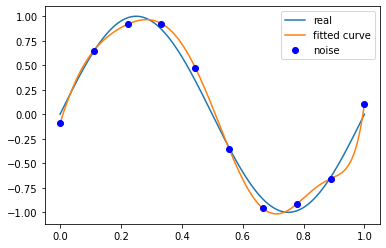

In [50]:
# M=9
p_lsq_0 = fitting(M=9)